Bharat Intern Internship

Task 2 : Titanic Classification

Titanic Classification (task description):
Make a system which tells whether the person will be
save from sinking. What factors were
most likely lead to success-socio-economic
status, age, gender and more.

Steps involved in task
1.Import modules
2.Load the Dataset
3.Data Preprocessing
4.Exploratory Data Analysis(Data visualisation)
5.Checking the target variable(Survived)
6.Label Encoding 
7.Using machine learning algorithms and comparing them 



Data Preparation

In [2]:
# Linear algebra
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['train_test'] = 1
test_df['train_test'] = 0
# test_df['Survived'] = np.NaN
all_data = pd.concat([train_df,test_df])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [3]:
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [4]:
test_df.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


Data Preprocessing and Data Cleaning

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Data Visualization

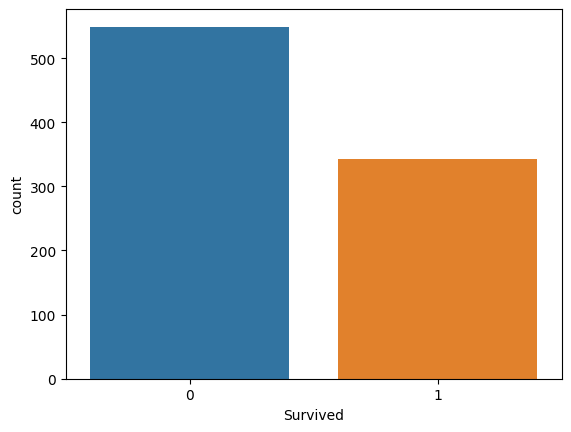

In [7]:
sns.countplot(x='Survived',data=train_df);

<Axes: xlabel='Pclass', ylabel='count'>

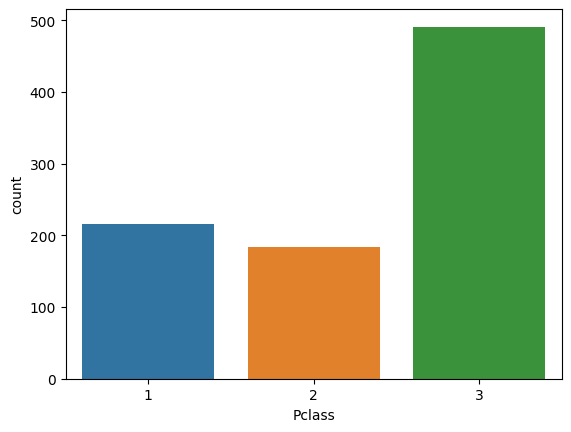

In [8]:
sns.countplot(x='Pclass',data=train_df)

<Axes: xlabel='Sex', ylabel='count'>

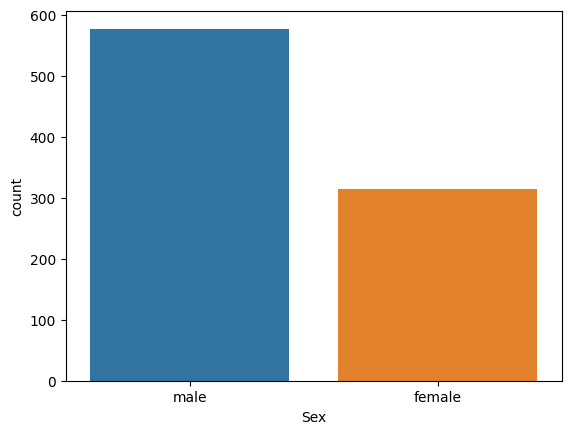

In [9]:
sns.countplot(x='Sex',data=train_df)

<Axes: xlabel='SibSp', ylabel='count'>

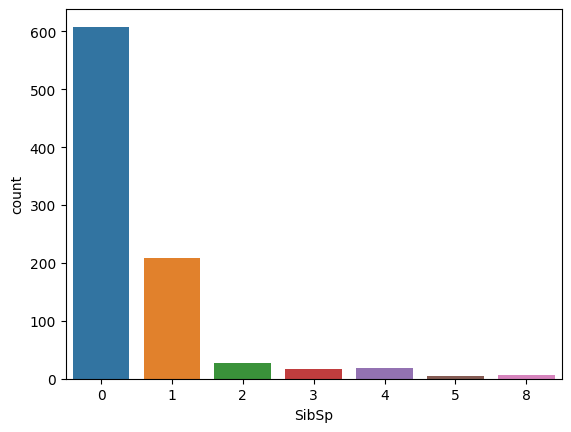

In [10]:
sns.countplot(x='SibSp',data=train_df)

<Axes: xlabel='Parch', ylabel='count'>

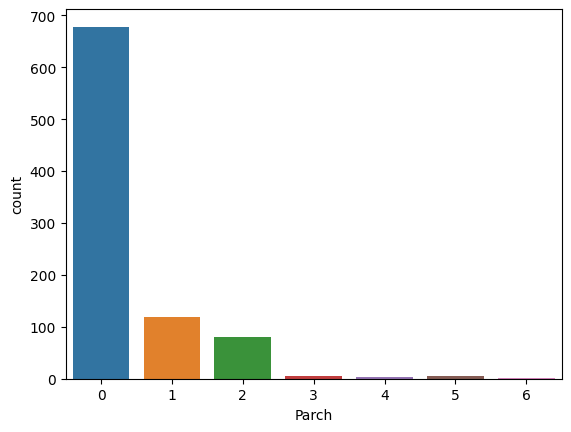

In [11]:
sns.countplot(x='Parch',data=train_df)

<Axes: xlabel='Embarked', ylabel='count'>

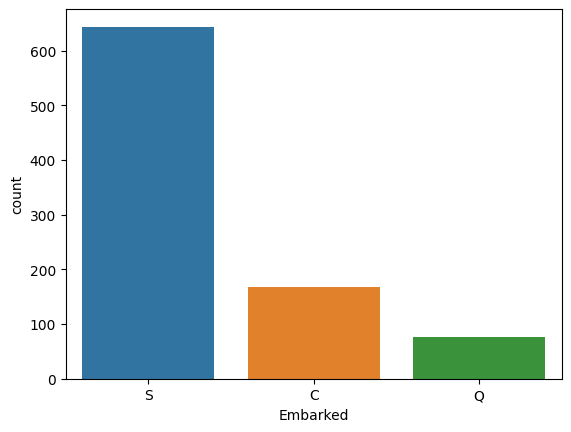

In [12]:
sns.countplot(x='Embarked',data=train_df)

<Axes: xlabel='Age', ylabel='Density'>

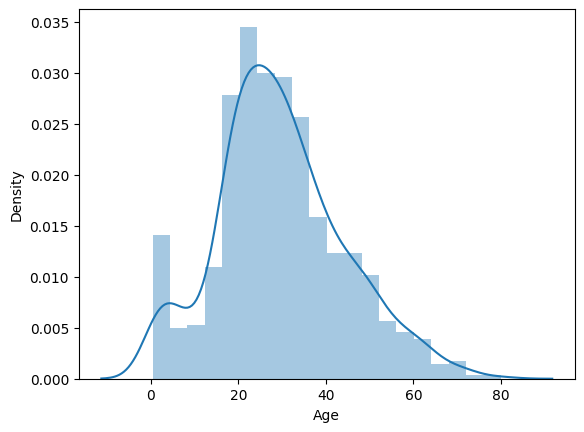

In [13]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 
sns.distplot(train_df['Age'])

The above Plot shows that most people of age group of 20-40 are died

<Axes: xlabel='Fare', ylabel='Density'>

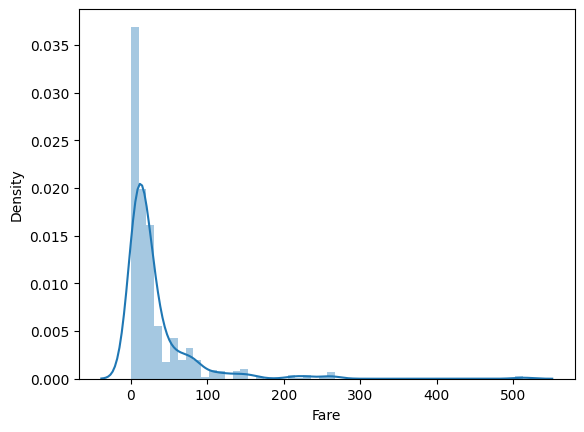

In [14]:
sns.distplot(train_df['Fare'])

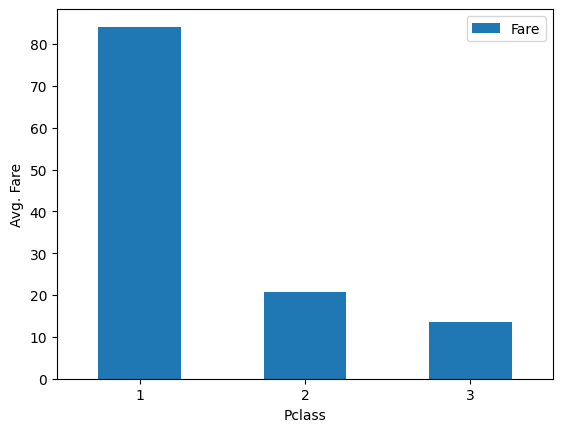

In [15]:
class_fare = train_df.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

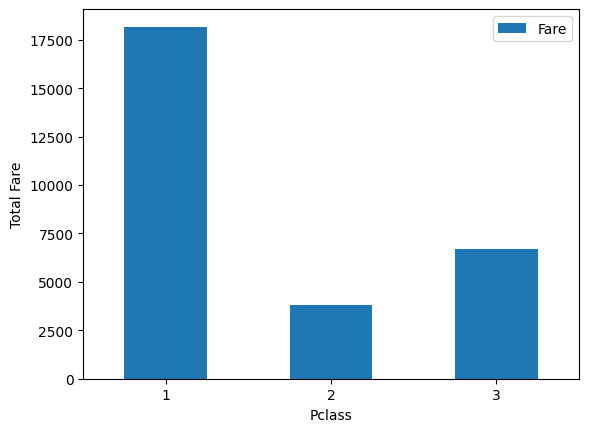

In [16]:
class_fare = train_df.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

In [17]:
train_df[train_df['Age']<18].groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  train_test  
Sex    Pclass                          
female 1       104.083337         1.0  
       2        26.241667         1.0  
       3        18.727977         1.0  
male   1       116.072900         1.0  
       2        25.659473         1.0  
       3        22.752523         1.0

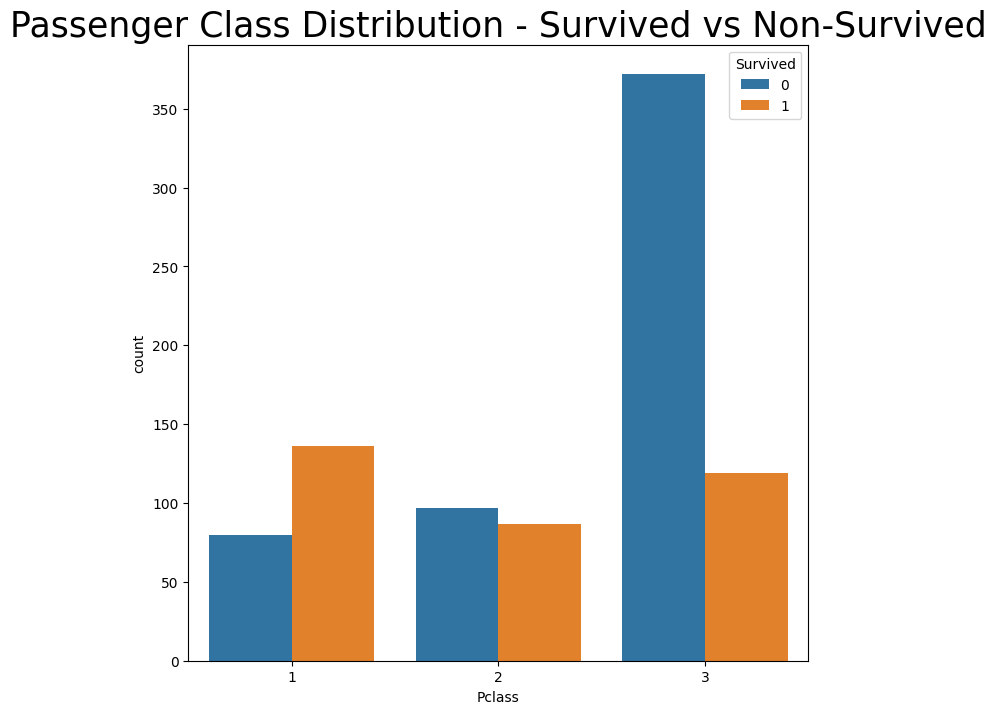

In [18]:
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=train_df)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25);

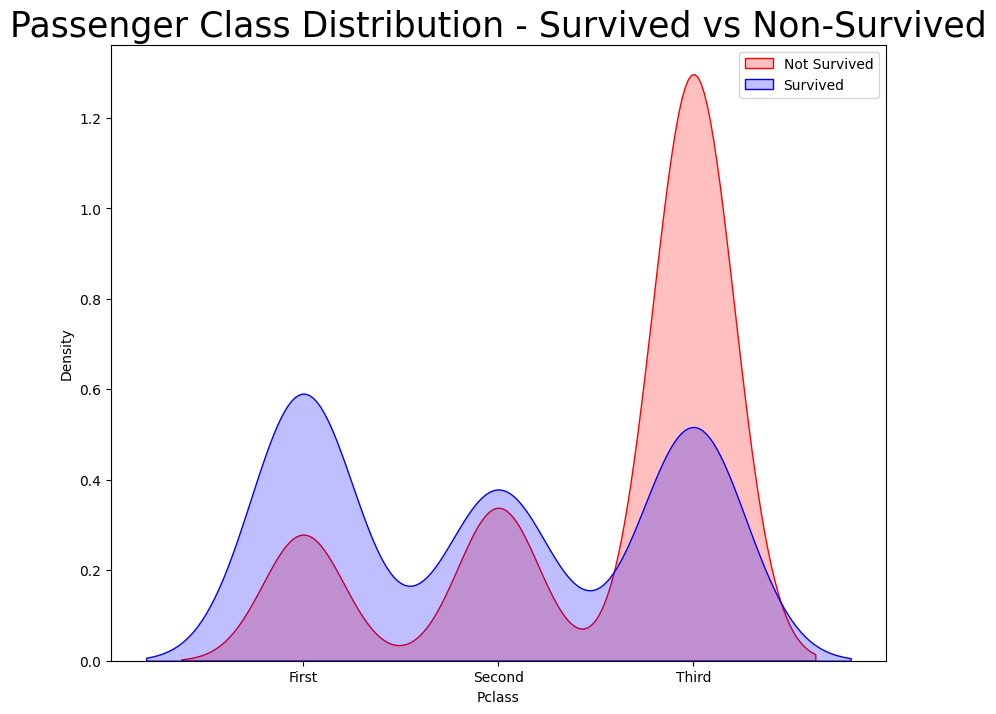

In [19]:
plt.subplots(figsize=(10,8))
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax.legend()
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')
ax.legend()

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train_df.Pclass.unique()),labels);

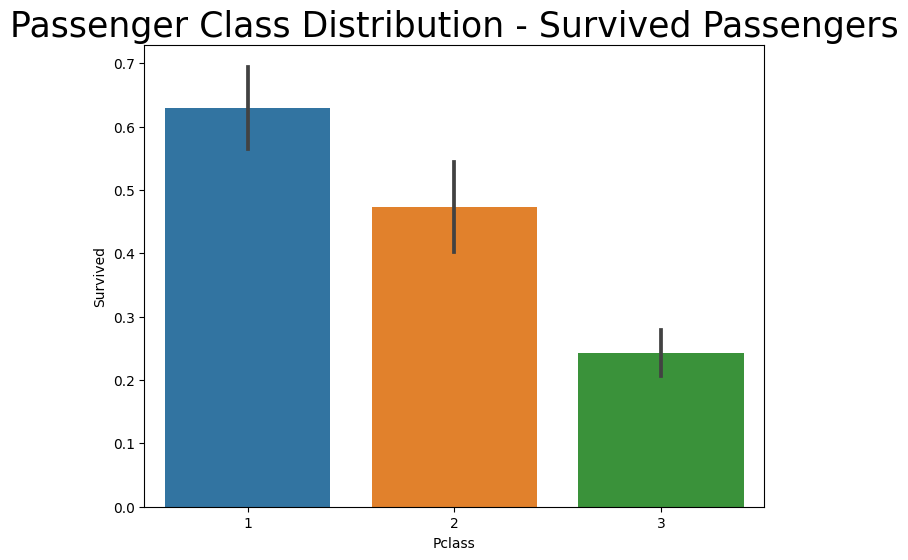

In [20]:
plt.subplots(figsize = (8,6))
sns.barplot(x='Pclass', y='Survived', data=train_df);
plt.title("Passenger Class Distribution - Survived Passengers", fontsize = 25);

<Axes: xlabel='Survived', ylabel='Fare'>

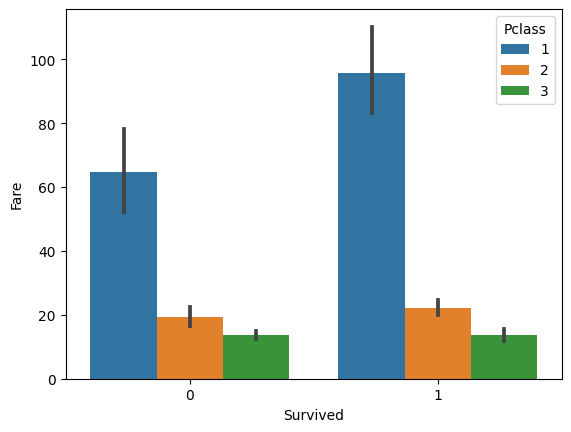

In [21]:
sns.barplot(data=train_df, x='Survived', y='Fare', hue='Pclass')

<Axes: xlabel='Age', ylabel='Fare'>

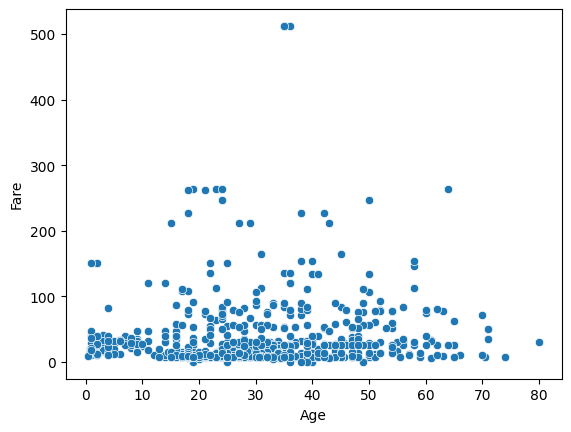

In [22]:
sns.scatterplot(x=train_df['Age'], y=train_df['Fare'])

<Axes: xlabel='Pclass', ylabel='Age'>

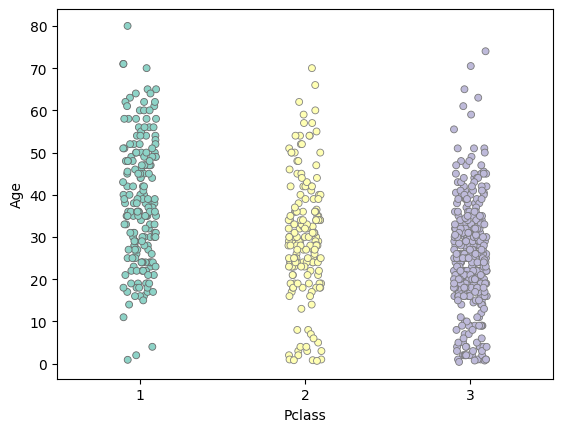

In [23]:
sns.stripplot(x=train_df['Pclass'], y=train_df['Age'], palette='Set3', linewidth=0.6)

In [82]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [24]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
train_df_len = len(train_df)
# combine two dataframes
df = pd.concat([train_df, test_df], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [26]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


In [27]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train_test        0
dtype: int64

In [28]:
df = df.drop(columns=['Ticket'], axis=1)

In [29]:
df['Age'].mean()

29.881137667304014

In [30]:
df['Survived'].mean()

0.3838383838383838

In [31]:
# fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [32]:
df['Embarked'].mode()[0]

'S'

In [33]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

<Axes: xlabel='Fare', ylabel='Density'>

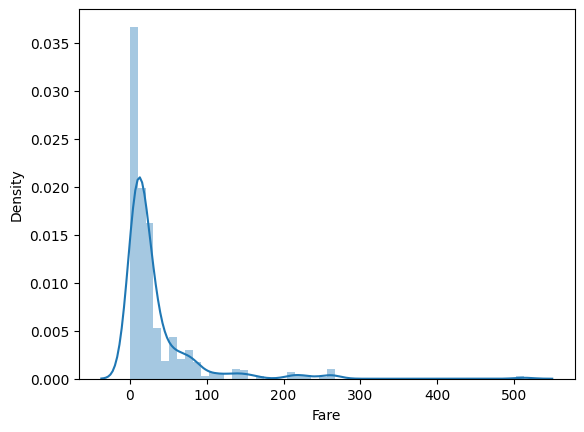

In [34]:
sns.distplot(df['Fare'])

In [35]:
df['Fare'] = np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

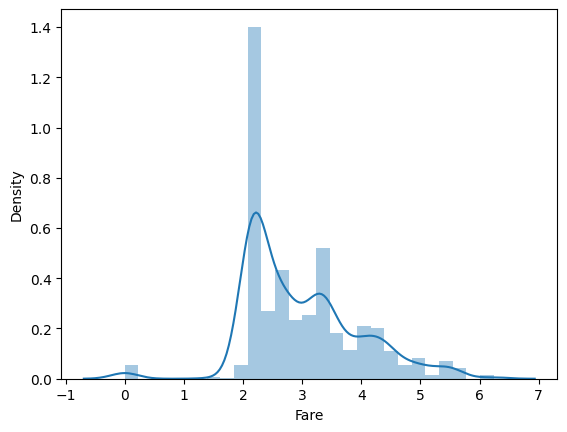

In [36]:
sns.distplot(df['Fare'])

<Axes: >

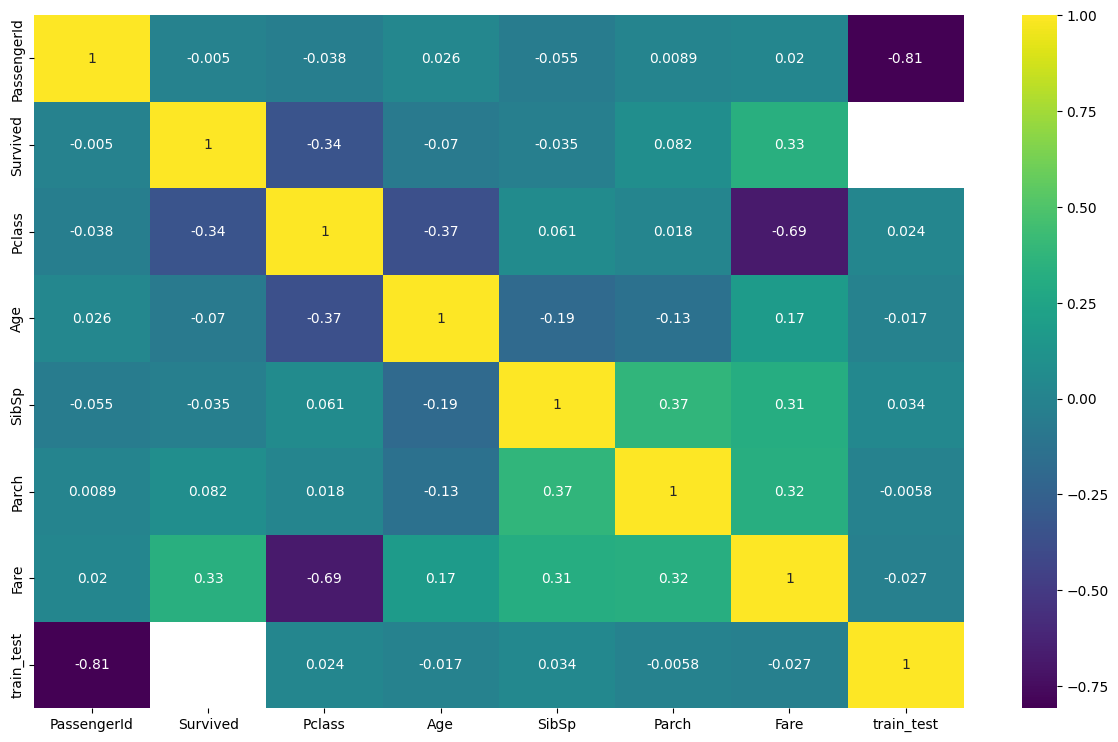

In [37]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='viridis')

The above Plot is clearly showing

*Strong Positive Correlation between SibSp and Parch

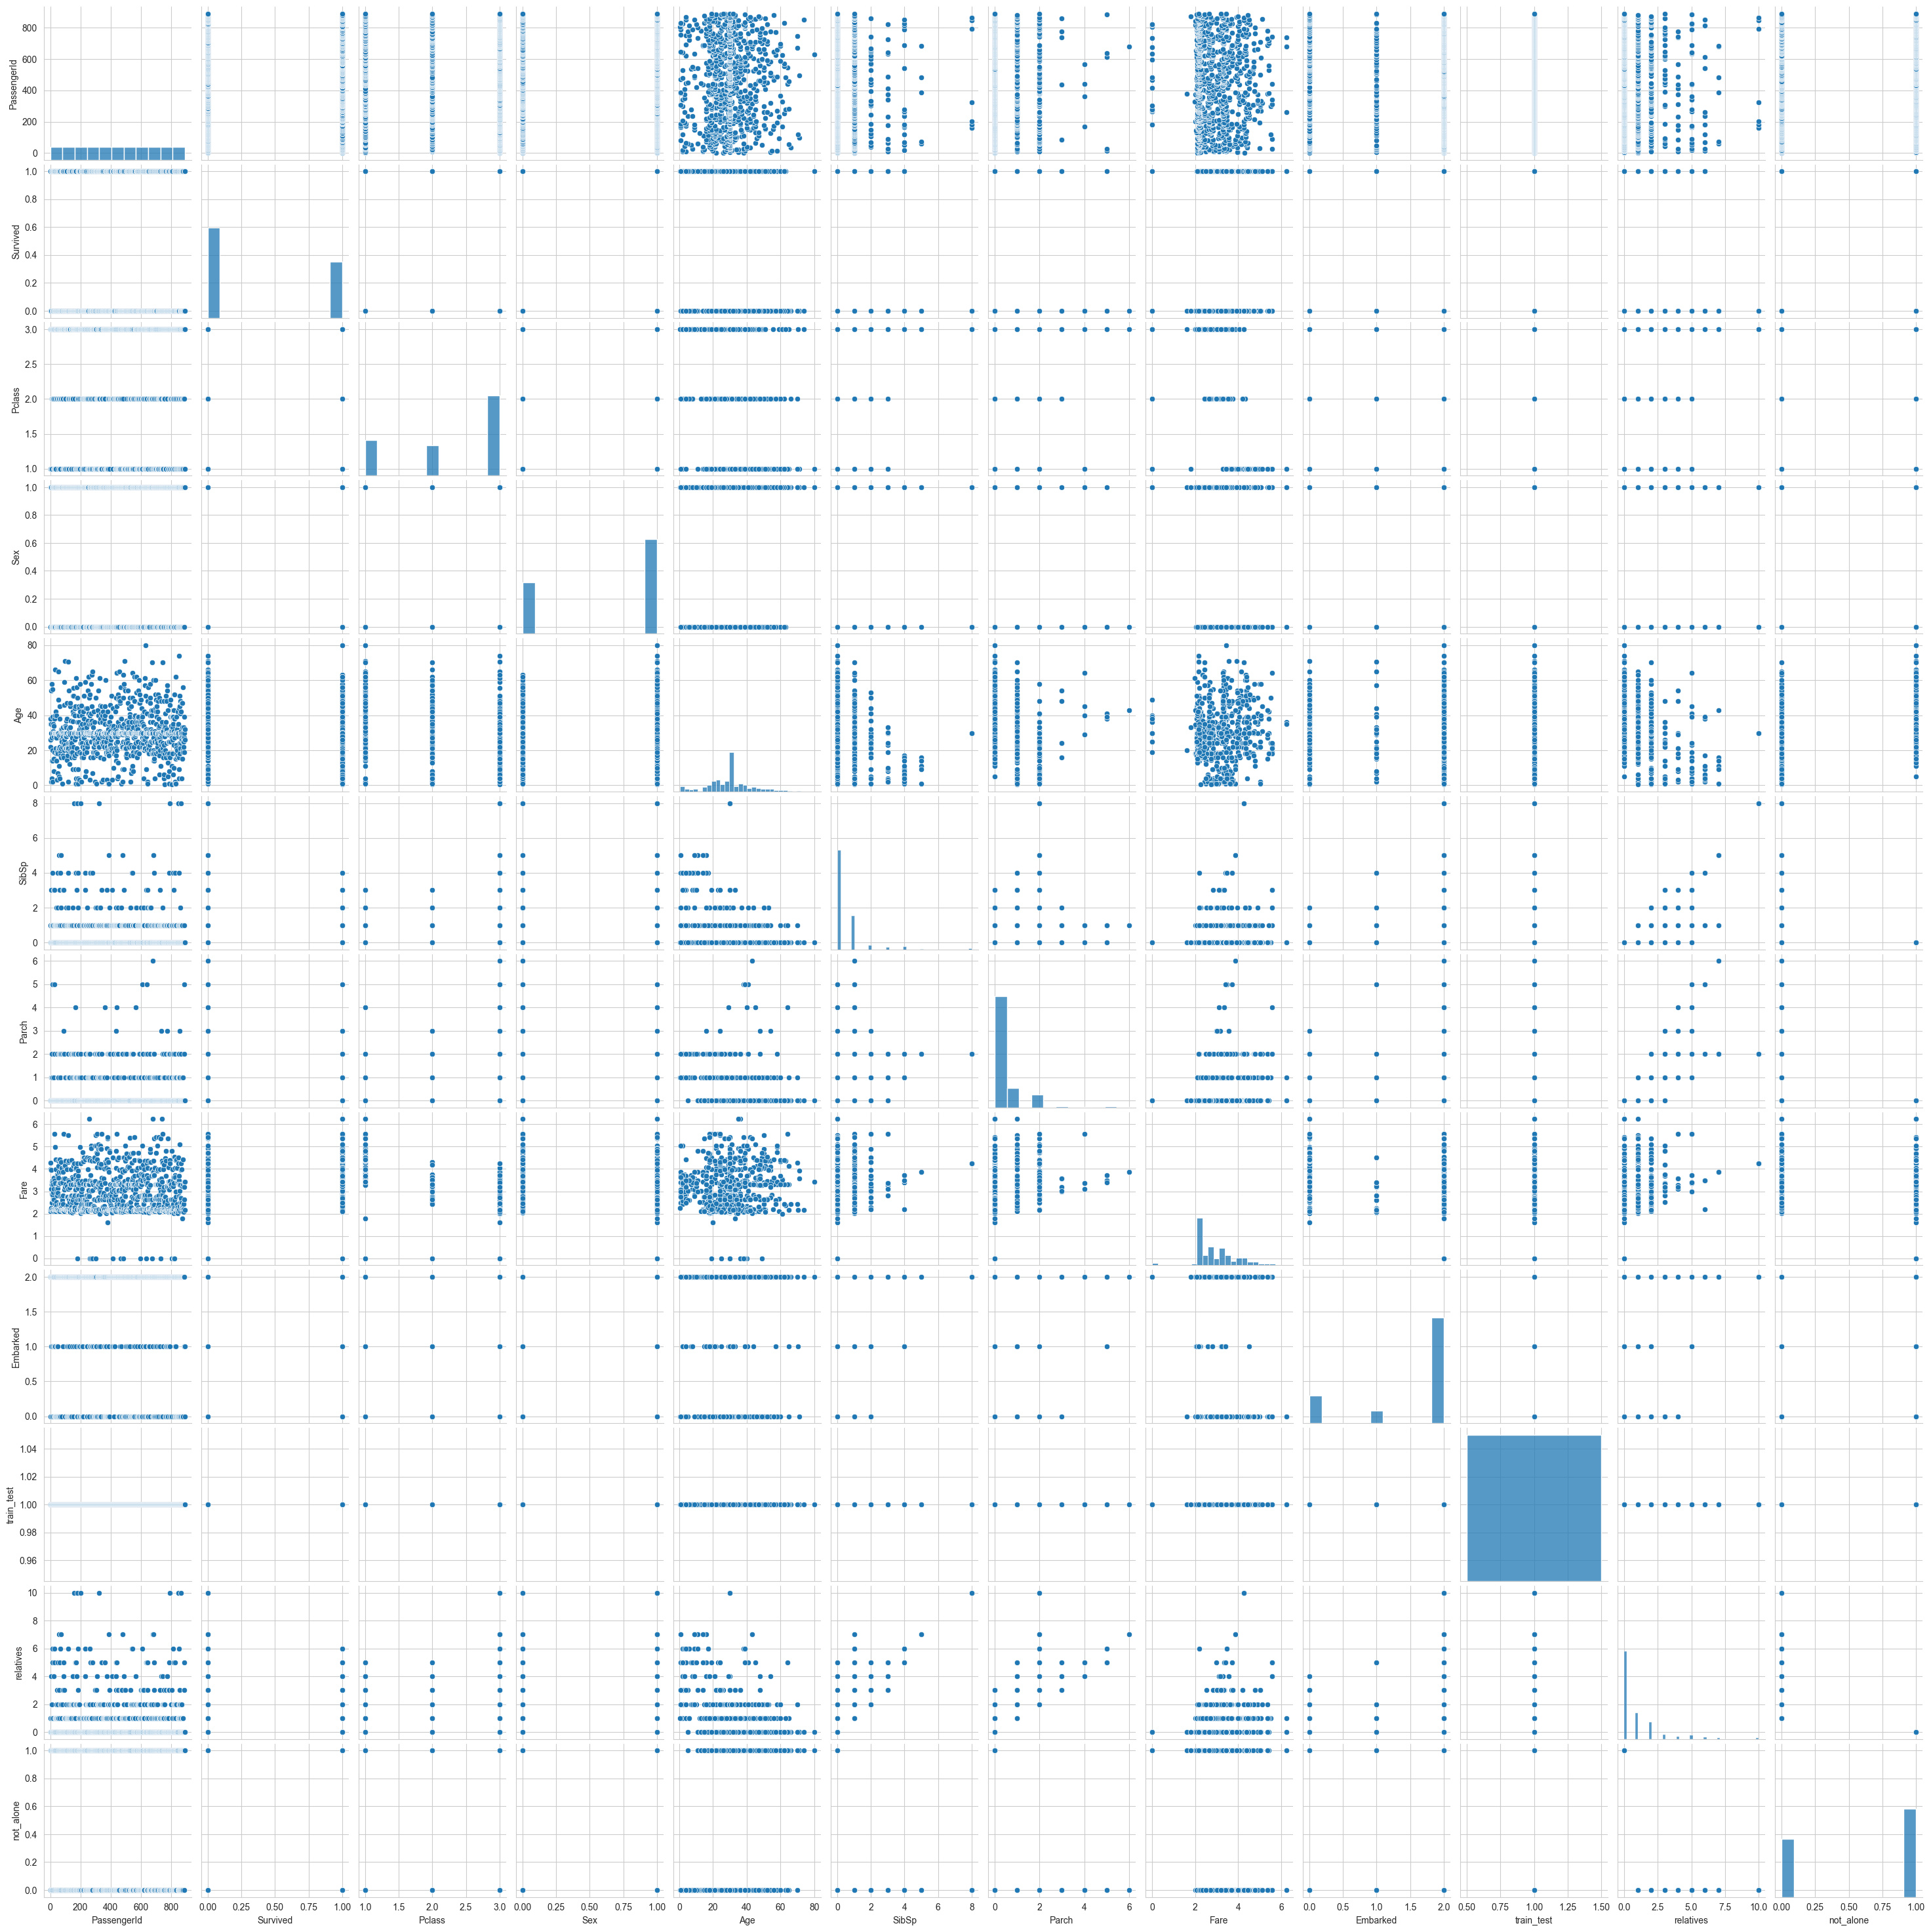

In [93]:
# Plotting pairplot
sns.pairplot(train_df)
plt.show()

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,2.110213,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.280593,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.188856,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.990834,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.202765,NaN,S,1


In [39]:
## drop unnecessary columns
df = df.drop(columns=['Name'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,train_test
0,1,0.0,3,male,22.0,1,0,2.110213,NaN,S,1
1,2,1.0,1,female,38.0,1,0,4.280593,C85,C,1
2,3,1.0,3,female,26.0,0,0,2.188856,NaN,S,1
3,4,1.0,1,female,35.0,1,0,3.990834,C123,S,1
4,5,0.0,3,male,35.0,0,0,2.202765,NaN,S,1


In [40]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,train_test
0,1,0.0,3,1,22.0,1,0,2.110213,NaN,2,1
1,2,1.0,1,0,38.0,1,0,4.280593,C85,0,1
2,3,1.0,3,0,26.0,0,0,2.188856,NaN,2,1
3,4,1.0,1,0,35.0,1,0,3.990834,C123,2,1
4,5,0.0,3,1,35.0,0,0,2.202765,NaN,2,1


In [41]:
train_df = df.iloc[:train_df_len, :]
test_df = df.iloc[train_df_len:, :]

In [42]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,train_test
0,1,0.0,3,1,22.0,1,0,2.110213,NaN,2,1
1,2,1.0,1,0,38.0,1,0,4.280593,C85,0,1
2,3,1.0,3,0,26.0,0,0,2.188856,NaN,2,1
3,4,1.0,1,0,35.0,1,0,3.990834,C123,2,1
4,5,0.0,3,1,35.0,0,0,2.202765,NaN,2,1


In [43]:
test_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,train_test
891,892,NaN,3,1,34.5,0,0,2.178064,NaN,1,0
892,893,NaN,3,0,47.0,1,0,2.079442,NaN,2,0
893,894,NaN,2,1,62.0,0,0,2.369075,NaN,1,0
894,895,NaN,3,1,27.0,0,0,2.268252,NaN,2,0
895,896,NaN,3,0,22.0,1,1,2.586824,NaN,2,0


Checking the target variable

In [127]:
train_df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

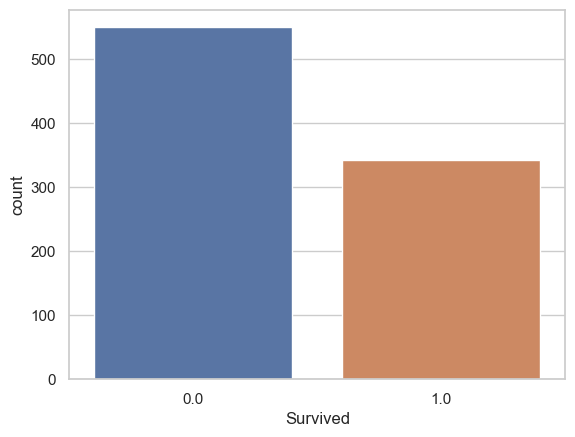

In [128]:
sns.countplot(x=train_df['Survived'])
plt.show()

In [44]:
y = train_df['Survived']

y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [100]:

df=pd.read_csv("train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Label Encoding

In [129]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()
import pandas as pd
df=pd.read_csv("train.csv")
# Apply label encoding to each categorical column
for column in ['Sex','Embarked']:
    df[column] = le.fit_transform(df[column])

df.head()
# Sex Column

# 0 represents female
# 1 represents Male

# Embarked Column

# 0 represents C
# 1 represents Q
# 2 represents S

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


Data Modelling

In [47]:
# importing libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

Selecting the independent and dependent Features

In [50]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = train_df[cols]
y = train_df['Survived']
print(x.shape)
print(y.shape)
print(type(x))  # DataFrame
print(type(y))  # Series

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [51]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [52]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [53]:
print(891*0.10)

89.10000000000001


TRAIN_TEST_SPLIT

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


CREATING FUNCTIONS TO COMPUTE CONFUSION MATRIX,CLASSIFICATION REPORT,ACCURACY


In [55]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

MACHINE LEARNING ALGORITHMS USED:

LR,
KNN,
SVC,
RF,
DST,
ADA

Logistic Regression(LR)

In [56]:
# Building the logistic Regression Model
lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [57]:
# Computing Training and Testing score
mscore(lr)

Training Score 0.8052434456928839
Testing Score 0.7555555555555555


In [58]:
# Generating Prediction
ypred_lr = lr.predict(x_test)
print(ypred_lr)

[1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]


In [59]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[43 10]
 [12 25]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.80        53
         1.0       0.71      0.68      0.69        37

    accuracy                           0.76        90
   macro avg       0.75      0.74      0.75        90
weighted avg       0.75      0.76      0.75        90

Accuracy Score 0.7555555555555555


knnClassifier ModeL(KNN)

In [60]:
# Building the knnClassifier Model
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [61]:
# Computing Training and Testing score
mscore(knn)

Training Score 0.818976279650437
Testing Score 0.7222222222222222


In [62]:
# Generating Prediction
ypred_knn = knn.predict(x_test)
print(ypred_knn)

[0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [63]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_knn)
acc_knn = accuracy_score(y_test,ypred_knn)
print('Accuracy Score',acc_knn)

Confusion Matrix
 [[49  4]
 [21 16]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.70      0.92      0.80        53
         1.0       0.80      0.43      0.56        37

    accuracy                           0.72        90
   macro avg       0.75      0.68      0.68        90
weighted avg       0.74      0.72      0.70        90

Accuracy Score 0.7222222222222222


Support Vector Classifier Model(SVC)

In [64]:
# Building Support Vector Classifier Model
svc = SVC(C=1.0)
svc.fit(x_train, y_train)

SVC()

In [65]:
# Computing Training and Testing score
mscore(svc)

Training Score 0.7078651685393258
Testing Score 0.6555555555555556


In [66]:
# Generating Prediction
ypred_svc = svc.predict(x_test)
print(ypred_svc)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [67]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_svc)
acc_svc = accuracy_score(y_test,ypred_svc)
print('Accuracy Score',acc_svc)

Confusion Matrix
 [[51  2]
 [29  8]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.64      0.96      0.77        53
         1.0       0.80      0.22      0.34        37

    accuracy                           0.66        90
   macro avg       0.72      0.59      0.55        90
weighted avg       0.70      0.66      0.59        90

Accuracy Score 0.6555555555555556


 RandomForest Classifier Model(RF)

In [68]:
# Building the RandomForest Classifier Model
rfc=RandomForestClassifier(n_estimators=80,criterion='entropy',min_samples_split=5,max_depth=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

In [69]:
# Computing Training and Testing score
mscore(rfc)

Training Score 0.916354556803995
Testing Score 0.7555555555555555


In [70]:
# Generating Prediction
ypred_rfc = rfc.predict(x_test)
print(ypred_rfc)

[1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]


In [71]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_rfc)
acc_rfc = accuracy_score(y_test,ypred_rfc)
print('Accuracy Score',acc_rfc)

Confusion Matrix
 [[47  6]
 [16 21]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.75      0.89      0.81        53
         1.0       0.78      0.57      0.66        37

    accuracy                           0.76        90
   macro avg       0.76      0.73      0.73        90
weighted avg       0.76      0.76      0.75        90

Accuracy Score 0.7555555555555555


DecisionTree Classifier Model(DST)

In [72]:
# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [73]:
# Computing Training and Testing score
mscore(dt)

Training Score 0.8526841448189763
Testing Score 0.7777777777777778


In [74]:
# Generating Prediction
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]


In [75]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)

Confusion Matrix
 [[46  7]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.78      0.87      0.82        53
         1.0       0.77      0.65      0.71        37

    accuracy                           0.78        90
   macro avg       0.78      0.76      0.76        90
weighted avg       0.78      0.78      0.77        90

Accuracy Score 0.7777777777777778


Adaboost model(ADA)

In [76]:
# Builing the Adaboost model
ada_boost  = AdaBoostClassifier(n_estimators=80)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=80)

In [77]:
# Computing the Training and Testing Score
mscore(ada_boost)

Training Score 0.8564294631710362
Testing Score 0.7666666666666667


In [78]:
# Generating the predictions
ypred_ada_boost = ada_boost.predict(x_test)

In [79]:
# Evaluate the model - confusion matrix, classification Report, Accuracy Score
cls_eval(y_test,ypred_ada_boost)
acc_adab = accuracy_score(y_test,ypred_ada_boost)
print('Accuracy Score',acc_adab)

Confusion Matrix
 [[45  8]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.78      0.85      0.81        53
         1.0       0.75      0.65      0.70        37

    accuracy                           0.77        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


MACHINE LEARNING ALGORITHMS COMPARISON

In [80]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','knn','SVC','Random Forest Classifier','Decision Tree Classifier','Ada Boost Classifier'],
    'Score': [acc_lr,acc_knn,acc_svc,acc_rfc,acc_dt,acc_adab]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Decision Tree Classifier,0.777778
5,Ada Boost Classifier,0.766667
0,Logistic Regression,0.755556
3,Random Forest Classifier,0.755556
1,knn,0.722222
2,SVC,0.655556


COMPARISON USING GRAPH

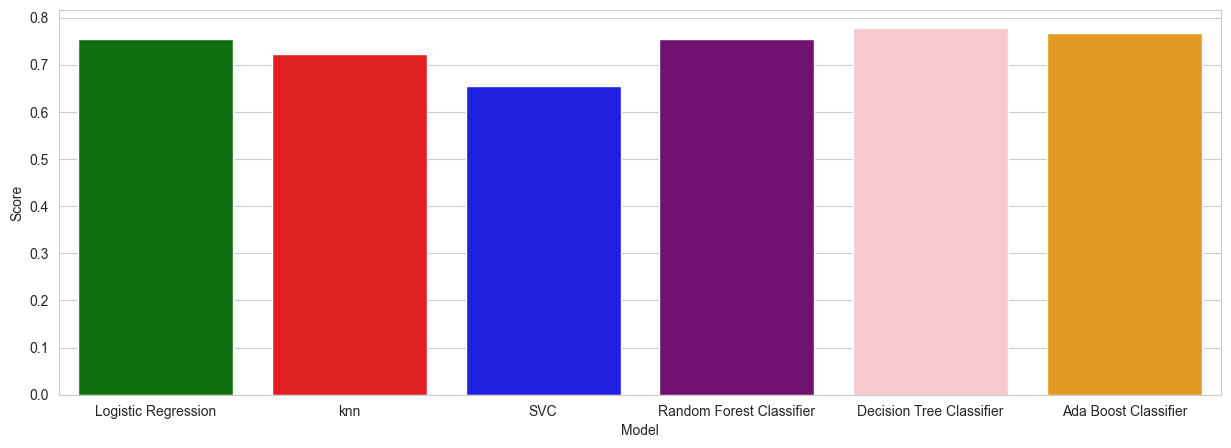

In [81]:
colors = ["green", "red", "blue", "purple","pink","orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

DecisionTree Classifier Model gives the  Highest Accuracy